# THIS IS A HYBRID ENSEMBLE AS META LEARNER I AM USING CAPSULENET AND FOR META FEATURES I AM USING THE BASE ENSEMBLES OF BAYESIAN MODEL AVERAGING AND WEIGHTED VOTE 


In [42]:
import pandas as pd

# Load Bayesian predictions for each task
bayesian_predictions_snli = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_all.csv")
bayesian_predictions_mnli_matched = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_mnli_matched.csv")
bayesian_predictions_mnli_mismatched = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_mnli_mismatched.csv")
bayesian_predictions_anli_r1 = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_anli_r1.csv")
bayesian_predictions_anli_r2 = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_anli_r2.csv")
bayesian_predictions_anli_r3 = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_anli_r3.csv")
bayesian_predictions_all = pd.read_csv("/kaggle/input/hybrid/bayesian_predictions_all.csv")

In [43]:
bayesian_predictions_snli

,Entailment,Neutral,Contradiction,True_Label
0,0.013525,0.940412,0.046063,1
1,0.654903,0.257940,0.087157,0
2,0.125068,0.028672,0.846260,2
3,0.017663,0.976611,0.005726,1
4,0.341223,0.570733,0.088045,0
...,...,...,...,...
32666,0.086380,0.240948,0.672672,2
32667,0.124037,0.364951,0.511013,2
32668,0.256775,0.275861,0.467364,2
32669,0.068580,0.199968,0.731452,2


In [44]:
bayesian_predictions_all

,Entailment,Neutral,Contradiction,True_Label
0,0.013525,0.940412,0.046063,1
1,0.654903,0.257940,0.087157,0
2,0.125068,0.028672,0.846260,2
3,0.017663,0.976611,0.005726,1
4,0.341223,0.570733,0.088045,0
...,...,...,...,...
32666,0.086380,0.240948,0.672672,2
32667,0.124037,0.364951,0.511013,2
32668,0.256775,0.275861,0.467364,2
32669,0.068580,0.199968,0.731452,2


In [45]:
bayesian_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32671 entries, 0 to 32670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entailment     32671 non-null  float64
 1   Neutral        32671 non-null  float64
 2   Contradiction  32671 non-null  float64
 3   True_Label     32671 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1021.1 KB


In [46]:
# Load majority vote predictions for each task
weighted_predictions_snli = pd.read_csv("/kaggle/input/weighted/weighted_predictions_snli.csv")
weighted_predictions_mnli_matched = pd.read_csv("/kaggle/input/weighted/weighted_predictions_mnli_matched.csv")
weighted_predictions_mnli_mismatched = pd.read_csv("/kaggle/input/weighted/weighted_predictions_mnli_mismatched.csv")
weighted_predictions_anli_r1 = pd.read_csv("/kaggle/input/weighted/weighted_predictions_anli_r1.csv")
weighted_predictions_anli_r2 = pd.read_csv("/kaggle/input/weighted/weighted_predictions_anli_r2.csv")
weighted_predictions_anli_r3 = pd.read_csv("/kaggle/input/weighted/weighted_predictions_anli_r3.csv")
weighted_predictions_all = pd.read_csv("/kaggle/input/weighted/weighted_predictions_combined.csv")

In [47]:
weighted_predictions_snli

,Weighted_Predictions_SNLI,True_Label,Weight_Deberta,Weight_Roberta,Weight_Albert
0,1,1,0.134832,0.432488,0.43268
1,0,0,0.134832,0.432488,0.43268
2,2,2,0.134832,0.432488,0.43268
3,1,1,0.134832,0.432488,0.43268
4,1,0,0.134832,0.432488,0.43268
...,...,...,...,...,...
9819,2,2,0.134832,0.432488,0.43268
9820,0,0,0.134832,0.432488,0.43268
9821,2,2,0.134832,0.432488,0.43268
9822,0,0,0.134832,0.432488,0.43268


In [48]:
weighted_predictions_snli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9824 entries, 0 to 9823
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weighted_Predictions_SNLI  9824 non-null   int64  
 1   True_Label                 9824 non-null   int64  
 2   Weight_Deberta             9824 non-null   float64
 3   Weight_Roberta             9824 non-null   float64
 4   Weight_Albert              9824 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 383.9 KB


In [49]:
weighted_predictions_mnli_matched

,Weighted_Predictions_MNLI_Matched,True_Label,Weight_Deberta,Weight_Roberta,Weight_Albert
0,1,1,0.134832,0.432488,0.43268
1,2,2,0.134832,0.432488,0.43268
2,0,0,0.134832,0.432488,0.43268
3,2,2,0.134832,0.432488,0.43268
4,2,2,0.134832,0.432488,0.43268
...,...,...,...,...,...
9810,0,1,0.134832,0.432488,0.43268
9811,2,2,0.134832,0.432488,0.43268
9812,0,0,0.134832,0.432488,0.43268
9813,0,0,0.134832,0.432488,0.43268


In [50]:
weighted_predictions_anli_r1

,Weighted_Predictions_ANLI_R1,True_Label,Weight_Deberta,Weight_Roberta,Weight_Albert
0,1,0,0.134832,0.432488,0.43268
1,0,0,0.134832,0.432488,0.43268
2,0,0,0.134832,0.432488,0.43268
3,1,1,0.134832,0.432488,0.43268
4,2,2,0.134832,0.432488,0.43268
...,...,...,...,...,...
995,2,0,0.134832,0.432488,0.43268
996,1,1,0.134832,0.432488,0.43268
997,1,0,0.134832,0.432488,0.43268
998,1,1,0.134832,0.432488,0.43268


In [51]:
weighted_predictions_all

,Weighted_Predictions_Combined,True_Label,Weight_Deberta,Weight_Roberta,Weight_Albert
0,1,1,0.139391,0.429335,0.431274
1,0,0,0.139391,0.429335,0.431274
2,2,2,0.139391,0.429335,0.431274
3,1,1,0.139391,0.429335,0.431274
4,1,0,0.139391,0.429335,0.431274
...,...,...,...,...,...
32466,1,1,0.139391,0.429335,0.431274
32467,2,1,0.139391,0.429335,0.431274
32468,1,2,0.139391,0.429335,0.431274
32469,1,0,0.139391,0.429335,0.431274


In [52]:
weighted_predictions_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32471 entries, 0 to 32470
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weighted_Predictions_Combined  32471 non-null  int64  
 1   True_Label                     32471 non-null  int64  
 2   Weight_Deberta                 32471 non-null  float64
 3   Weight_Roberta                 32471 non-null  float64
 4   Weight_Albert                  32471 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.2 MB


In [53]:
# Select the Bayesian predictions for SNLI
X_bayesian_snli = bayesian_predictions_snli[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for SNLI from the weighted dataframe
weighted_predictions_snli_only = weighted_predictions_snli[['Weighted_Predictions_SNLI','Weight_Deberta','Weight_Roberta','Weight_Albert']]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_snli = pd.concat([X_bayesian_snli, weighted_predictions_snli_only], axis=1)


In [54]:
X_combined_snli

,Entailment,Neutral,Contradiction,Weighted_Predictions_SNLI,Weight_Deberta,Weight_Roberta,Weight_Albert
0,0.013525,0.940412,0.046063,1.0,0.134832,0.432488,0.43268
1,0.654903,0.257940,0.087157,0.0,0.134832,0.432488,0.43268
2,0.125068,0.028672,0.846260,2.0,0.134832,0.432488,0.43268
3,0.017663,0.976611,0.005726,1.0,0.134832,0.432488,0.43268
4,0.341223,0.570733,0.088045,1.0,0.134832,0.432488,0.43268
...,...,...,...,...,...,...,...
32666,0.086380,0.240948,0.672672,NaN,NaN,NaN,NaN
32667,0.124037,0.364951,0.511013,NaN,NaN,NaN,NaN
32668,0.256775,0.275861,0.467364,NaN,NaN,NaN,NaN
32669,0.068580,0.199968,0.731452,NaN,NaN,NaN,NaN


In [55]:
# Select the Bayesian predictions for MNLI Matched
X_bayesian_mnli_matched = bayesian_predictions_mnli_matched[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for MNLI Matched from the weighted dataframe
weighted_predictions_mnli_matched_only = weighted_predictions_mnli_matched[['Weighted_Predictions_MNLI_Matched','Weight_Deberta','Weight_Roberta','Weight_Albert']]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_mnli_matched = pd.concat([X_bayesian_mnli_matched, weighted_predictions_mnli_matched_only], axis=1)


# Select the Bayesian predictions for MNLI Mismatched
X_bayesian_mnli_mismatched = bayesian_predictions_mnli_mismatched[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for MNLI Mismatched from the weighted dataframe
weighted_predictions_mnli_mismatched_only = weighted_predictions_mnli_mismatched[['Weighted_Predictions_MNLI_Mismatched','Weight_Deberta','Weight_Roberta','Weight_Albert']]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_mnli_mismatched = pd.concat([X_bayesian_mnli_mismatched, weighted_predictions_mnli_mismatched_only], axis=1)


# Select the Bayesian predictions for ANLI Round 1
X_bayesian_anli_r1 = bayesian_predictions_anli_r1[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for ANLI Round 1 from the weighted dataframe
weighted_predictions_anli_r1_only = weighted_predictions_anli_r1[['Weighted_Predictions_ANLI_R1','Weight_Deberta','Weight_Roberta','Weight_Albert']]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_anli_r1 = pd.concat([X_bayesian_anli_r1, weighted_predictions_anli_r1_only], axis=1)

# Select the Bayesian predictions for ANLI Round 2
X_bayesian_anli_r2 = bayesian_predictions_anli_r2[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for ANLI Round 2 from the weighted dataframe
weighted_predictions_anli_r2_only = weighted_predictions_anli_r2[['Weighted_Predictions_ANLI_R2','Weight_Deberta','Weight_Roberta','Weight_Albert']]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_anli_r2 = pd.concat([X_bayesian_anli_r2, weighted_predictions_anli_r2_only], axis=1)


# Select the Bayesian predictions for ANLI Round 3
X_bayesian_anli_r3 = bayesian_predictions_anli_r3[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for ANLI Round 3 from the weighted dataframe
weighted_predictions_anli_r3_only = weighted_predictions_anli_r3[['Weighted_Predictions_ANLI_R3','Weight_Deberta','Weight_Roberta','Weight_Albert']]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_anli_r3 = pd.concat([X_bayesian_anli_r3, weighted_predictions_anli_r3_only], axis=1)


# Select the Bayesian predictions for SNLI
X_bayesian_all = bayesian_predictions_all[['Entailment', 'Neutral', 'Contradiction']]

# Select the Weighted Predictions column for SNLI from the weighted dataframe
weighted_predictions_all_only = weighted_predictions_all[['Weighted_Predictions_Combined',]]

# Concatenate the Bayesian dataframe with the specific weighted predictions column
X_combined_all = pd.concat([X_bayesian_all, weighted_predictions_all_only], axis=1)


In [56]:
X_combined_mnli_matched

,Entailment,Neutral,Contradiction,Weighted_Predictions_MNLI_Matched,Weight_Deberta,Weight_Roberta,Weight_Albert
0,0.013297,0.969679,0.017024,1,0.134832,0.432488,0.43268
1,0.117013,0.004297,0.878689,2,0.134832,0.432488,0.43268
2,0.801255,0.087380,0.111365,0,0.134832,0.432488,0.43268
3,0.115503,0.033445,0.851052,2,0.134832,0.432488,0.43268
4,0.115805,0.013206,0.870989,2,0.134832,0.432488,0.43268
...,...,...,...,...,...,...,...
9810,0.583619,0.365622,0.050759,0,0.134832,0.432488,0.43268
9811,0.115220,0.002774,0.882006,2,0.134832,0.432488,0.43268
9812,0.876416,0.009157,0.114427,0,0.134832,0.432488,0.43268
9813,0.881602,0.005484,0.112914,0,0.134832,0.432488,0.43268


In [57]:
X_combined_all 

,Entailment,Neutral,Contradiction,Weighted_Predictions_Combined
0,0.013525,0.940412,0.046063,1.0
1,0.654903,0.257940,0.087157,0.0
2,0.125068,0.028672,0.846260,2.0
3,0.017663,0.976611,0.005726,1.0
4,0.341223,0.570733,0.088045,1.0
...,...,...,...,...
32666,0.086380,0.240948,0.672672,NaN
32667,0.124037,0.364951,0.511013,NaN
32668,0.256775,0.275861,0.467364,NaN
32669,0.068580,0.199968,0.731452,NaN


In [58]:
y_snli = bayesian_predictions_snli['True_Label']
y_mnli_matched = bayesian_predictions_mnli_matched['True_Label']
y_mnli_mismatched = bayesian_predictions_mnli_mismatched['True_Label']
y_anli_r1 = bayesian_predictions_anli_r1['True_Label']
y_anli_r2 = bayesian_predictions_anli_r2['True_Label']
y_anli_r3 = bayesian_predictions_anli_r3['True_Label']
y_all = bayesian_predictions_all['True_Label']

In [59]:
y_all 

0        1
1        0
2        2
3        1
4        0
        ..
32666    2
32667    2
32668    2
32669    2
32670    2
Name: True_Label, Length: 32671, dtype: int64

In [60]:
# Drop rows with any NaN values in the features and labels for SNLI
combined_snli_clean = X_combined_snli.dropna()
y_snli_clean = y_snli.loc[combined_snli_clean.index]

# Drop rows with any NaN values in the features and labels for MNLI Matched
combined_mnli_matched_clean = X_combined_mnli_matched.dropna()
y_mnli_matched_clean = y_mnli_matched.loc[combined_mnli_matched_clean.index]

# Drop rows with any NaN values in the features and labels for MNLI Mismatched
combined_mnli_mismatched_clean = X_combined_mnli_mismatched.dropna()
y_mnli_mismatched_clean = y_mnli_mismatched.loc[combined_mnli_mismatched_clean.index]

# Drop rows with any NaN values in the features and labels for ANLI Round 1
combined_anli_r1_clean = X_combined_anli_r1.dropna()
y_anli_r1_clean = y_anli_r1.loc[combined_anli_r1_clean.index]

# Drop rows with any NaN values in the features and labels for ANLI Round 2
combined_anli_r2_clean = X_combined_anli_r2.dropna()
y_anli_r2_clean = y_anli_r2.loc[combined_anli_r2_clean.index]

# Drop rows with any NaN values in the features and labels for ANLI Round 3
combined_anli_r3_clean = X_combined_anli_r3.dropna()
y_anli_r3_clean = y_anli_r3.loc[combined_anli_r3_clean.index]

# Drop rows with any NaN values in the features and labels for ANLI Round 3
combined_all_clean = X_combined_all.dropna()
y_all_clean = y_all.loc[combined_all_clean.index]



In [61]:
y_all 

0        1
1        0
2        2
3        1
4        0
        ..
32666    2
32667    2
32668    2
32669    2
32670    2
Name: True_Label, Length: 32671, dtype: int64

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Initialize the scaler and encoder just once
scaler = StandardScaler()
encoder = OneHotEncoder()

# Scale the features and encode the labels for SNLI
X_snli_scaled = scaler.fit_transform(combined_snli_clean)
y_snli_encoded = encoder.fit_transform(y_snli_clean.to_numpy().reshape(-1, 1)).toarray()

# Scale the features and encode the labels for MNLI Matched
X_mnli_matched_scaled = scaler.fit_transform(combined_mnli_matched_clean)
y_mnli_matched_encoded = encoder.fit_transform(y_mnli_matched_clean.to_numpy().reshape(-1, 1)).toarray()

# Scale the features and encode the labels for MNLI Mismatched
X_mnli_mismatched_scaled = scaler.fit_transform(combined_mnli_mismatched_clean)
y_mnli_mismatched_encoded = encoder.fit_transform(y_mnli_mismatched_clean.to_numpy().reshape(-1, 1)).toarray()

# Scale the features and encode the labels for ANLI R1
X_anli_r1_scaled = scaler.fit_transform(combined_anli_r1_clean)
y_anli_r1_encoded = encoder.fit_transform(y_anli_r1_clean.to_numpy().reshape(-1, 1)).toarray()

# Scale the features and encode the labels for ANLI R2
X_anli_r2_scaled = scaler.fit_transform(combined_anli_r2_clean)
y_anli_r2_encoded = encoder.fit_transform(y_anli_r2_clean.to_numpy().reshape(-1, 1)).toarray()

# Scale the features and encode the labels for ANLI R3
X_anli_r3_scaled = scaler.fit_transform(combined_anli_r3_clean)
y_anli_r3_encoded = encoder.fit_transform(y_anli_r3_clean.to_numpy().reshape(-1, 1)).toarray()


# Scale the features and encode the labels for all
X_all_scaled = scaler.fit_transform(combined_all_clean)
y_all_encoded = encoder.fit_transform(y_all_clean.to_numpy().reshape(-1, 1)).toarray()


In [63]:
X_anli_r2_scaled 

array([[ 1.38121174e+00, -1.00515114e+00, -6.66063469e-02, ...,
         0.00000000e+00,  0.00000000e+00, -1.66533454e-16],
       [-5.09559361e-01,  1.41232297e-01,  3.15170207e-01, ...,
         0.00000000e+00,  0.00000000e+00, -1.66533454e-16],
       [-1.20395217e+00,  1.64007868e+00, -9.08859849e-01, ...,
         0.00000000e+00,  0.00000000e+00, -1.66533454e-16],
       ...,
       [-5.44865599e-01,  1.00839631e+00, -7.48196815e-01, ...,
         0.00000000e+00,  0.00000000e+00, -1.66533454e-16],
       [ 1.44557772e-01,  5.07338440e-01, -7.82274743e-01, ...,
         0.00000000e+00,  0.00000000e+00, -1.66533454e-16],
       [ 1.06886180e+00, -1.46708134e-01, -8.50388116e-01, ...,
         0.00000000e+00,  0.00000000e+00, -1.66533454e-16]])

In [64]:
y_anli_r2_encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [65]:
from sklearn.model_selection import train_test_split

# Define the test size and random state for reproducibility
test_size = 0.2
random_state = 42

# Split data for SNLI task
X_snli_train, X_snli_test, y_snli_train, y_snli_test = train_test_split(
    X_snli_scaled, y_snli_encoded, test_size=test_size, random_state=random_state
)

# Split data for MNLI Matched task
X_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_train, y_mnli_matched_test = train_test_split(
    X_mnli_matched_scaled, y_mnli_matched_encoded, test_size=test_size, random_state=random_state
)

# Split data for MNLI Mismatched task
X_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_train, y_mnli_mismatched_test = train_test_split(
    X_mnli_mismatched_scaled, y_mnli_mismatched_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 1 task
X_anli_r1_train, X_anli_r1_test, y_anli_r1_train, y_anli_r1_test = train_test_split(
    X_anli_r1_scaled, y_anli_r1_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 2 task
X_anli_r2_train, X_anli_r2_test, y_anli_r2_train, y_anli_r2_test = train_test_split(
    X_anli_r2_scaled, y_anli_r2_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 3 task
X_anli_r3_train, X_anli_r3_test, y_anli_r3_train, y_anli_r3_test = train_test_split(
    X_anli_r3_scaled, y_anli_r3_encoded, test_size=test_size, random_state=random_state
)

# Split data for ANLI Round 3 task
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all_scaled, y_all_encoded, test_size=test_size, random_state=random_state
)

In [66]:
X_all_train

array([[-0.90208653,  1.51886958, -0.87609227,  0.035962  ],
       [-0.61002684, -0.86810202,  1.59946465,  1.29022831],
       [-0.61707224, -0.87184616,  1.61067213,  1.29022831],
       ...,
       [-0.96945893,  1.59201382, -0.89492296,  0.035962  ],
       [-0.61913418, -0.75238561,  1.47452312,  1.29022831],
       [ 1.50902703, -0.80401917, -0.54311705, -1.21830432]])

In [67]:
y_all_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [68]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Adjusted Capsule Layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, num_routing=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.num_routing = num_routing
    
    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.num_capsules * self.dim_capsules),
            initializer="glorot_uniform",
            name="capsule_kernel",
        )
    
    def call(self, inputs):
        outputs = tf.matmul(inputs, self.kernel)
        outputs = tf.reshape(outputs, (-1, self.num_capsules, self.dim_capsules))
        
        b = tf.zeros(shape=(tf.shape(inputs)[0], self.num_capsules, 1))
        for _ in range(self.num_routing):
            c = tf.nn.softmax(b, axis=1)
            outputs = c * outputs
            outputs = self.squash(outputs)
            b += tf.reduce_sum(outputs * outputs, axis=-1, keepdims=True)
        
        return outputs
    
    @staticmethod
    def squash(vector):
        squared_norm = tf.reduce_sum(tf.square(vector), axis=-1, keepdims=True)
        scale = squared_norm / (1 + squared_norm) / tf.sqrt(squared_norm)
        return scale * vector


In [69]:
# Ensure Data is in Correct Format
def ensure_dense(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

# Apply Data Conversion and Reshaping for Other Tasks
X_snli_train = ensure_dense(X_snli_train)
X_snli_test = ensure_dense(X_snli_test)
y_snli_train = ensure_dense(y_snli_train)
y_snli_test = ensure_dense(y_snli_test)

# Apply Data Conversion and Reshaping for Other Tasks
X_mnli_matched_train = ensure_dense(X_mnli_matched_train)
X_mnli_matched_test = ensure_dense(X_mnli_matched_test)
y_mnli_matched_train = ensure_dense(y_mnli_matched_train)
y_mnli_matched_test = ensure_dense(y_mnli_matched_test)

X_mnli_mismatched_train = ensure_dense(X_mnli_mismatched_train)
X_mnli_mismatched_test = ensure_dense(X_mnli_mismatched_test)
y_mnli_mismatched_train = ensure_dense(y_mnli_mismatched_train)
y_mnli_mismatched_test = ensure_dense(y_mnli_mismatched_test)

X_anli_r1_train = ensure_dense(X_anli_r1_train)
X_anli_r1_test = ensure_dense(X_anli_r1_test)
y_anli_r1_train = ensure_dense(y_anli_r1_train)
y_anli_r1_test = ensure_dense(y_anli_r1_test)

X_anli_r2_train = ensure_dense(X_anli_r2_train)
X_anli_r2_test = ensure_dense(X_anli_r2_test)
y_anli_r2_train = ensure_dense(y_anli_r2_train)
y_anli_r2_test = ensure_dense(y_anli_r2_test)

X_anli_r3_train = ensure_dense(X_anli_r3_train)
X_anli_r3_test = ensure_dense(X_anli_r3_test)
y_anli_r3_train = ensure_dense(y_anli_r3_train)
y_anli_r3_test = ensure_dense(y_anli_r3_test)


X_all_train = ensure_dense(X_all_train)
X_all_test = ensure_dense(X_all_test)
y_alltrain = ensure_dense(y_all_train)
y_all_test = ensure_dense(y_all_test)

In [70]:
# Function to reshape 1D arrays into 2D if needed
def ensure_reshaped(data):
    if len(data.shape) == 1:
        return data.reshape((-1, 1))
    return data

# Reshape the training and test sets for all tasks
# SNLI
X_snli_train = ensure_reshaped(X_snli_train)
X_snli_test = ensure_reshaped(X_snli_test)

# Reshape the training and test sets for all tasks
# MNLI Matched
X_mnli_matched_train = ensure_reshaped(X_mnli_matched_train)
X_mnli_matched_test = ensure_reshaped(X_mnli_matched_test)

# MNLI Mismatched
X_mnli_mismatched_train = ensure_reshaped(X_mnli_mismatched_train)
X_mnli_mismatched_test = ensure_reshaped(X_mnli_mismatched_test)

# ANLI Round 1
X_anli_r1_train = ensure_reshaped(X_anli_r1_train)
X_anli_r1_test = ensure_reshaped(X_anli_r1_test)

# ANLI Round 2
X_anli_r2_train = ensure_reshaped(X_anli_r2_train)
X_anli_r2_test = ensure_reshaped(X_anli_r2_test)

# ANLI Round 3
X_anli_r3_train = ensure_reshaped(X_anli_r3_train)
X_anli_r3_test = ensure_reshaped(X_anli_r3_test)

# ALL
X_all_train = ensure_reshaped(X_all_train)
X_all_test = ensure_reshaped(X_all_test)

# Reshape the labels as well if required
y_mnli_matched_train = ensure_reshaped(y_mnli_matched_train)
y_mnli_matched_test = ensure_reshaped(y_mnli_matched_test)

y_mnli_mismatched_train = ensure_reshaped(y_mnli_mismatched_train)
y_mnli_mismatched_test = ensure_reshaped(y_mnli_mismatched_test)

y_anli_r1_train = ensure_reshaped(y_anli_r1_train)
y_anli_r1_test = ensure_reshaped(y_anli_r1_test)

y_anli_r2_train = ensure_reshaped(y_anli_r2_train)
y_anli_r2_test = ensure_reshaped(y_anli_r2_test)

y_anli_r3_train = ensure_reshaped(y_anli_r3_train)
y_anli_r3_test = ensure_reshaped(y_anli_r3_test)

y_all_train = ensure_reshaped(y_all_train)
y_all_test = ensure_reshaped(y_all_test)

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Function to create a simple dense model with regularization
def create_simple_dense_model(input_shape, num_classes):
    inputs = keras.Input(shape=(input_shape,))
    dense_layer = layers.Dense(64, activation='relu')(inputs)  # Simplified model
    dropout_layer = layers.Dropout(0.2)(dense_layer)  # Reduced dropout
    dense_layer_2 = layers.Dense(32, activation='relu')(dropout_layer)
    outputs = layers.Dense(num_classes, activation='softmax')(dense_layer_2)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Function to train and evaluate the model, returning history, test loss/accuracy, and the trained model
def train_and_evaluate(X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    model = create_simple_dense_model(
        input_shape=X_train.shape[1],  # Input feature count
        num_classes=y_train.shape[1],  # Number of output classes
    )
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Set learning rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate adjustment
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
    
    # Fit the model with validation data and callbacks
    history = model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=callbacks
    )
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    # Return history, test loss, test accuracy, and the model
    return history, test_loss, test_accuracy, model

In [72]:
import matplotlib.pyplot as plt

# Function to plot training/validation accuracy and loss from history
def plot_training_history(history, title_prefix="Model"):
    # Create subplots for accuracy and loss
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot (training and validation)
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    axes[0].set_title(f'{title_prefix} - Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss plot (training and validation)
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    axes[1].set_title(f'{title_prefix} - Training and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [73]:
# Call the function for a specific task (example: snli)
history_snli, test_loss_snli, test_accuracy_snli, trained_model_snli = train_and_evaluate(
    X_snli_train, y_snli_train, X_snli_test, y_snli_test, epochs=20, batch_size=32
)

print("Test loss on SNLI:", test_loss_snli)
print("Test accuracy on SNLI:", test_accuracy_snli)

# Now you can use `history` to plot the training and validation loss/accuracy over epochs


Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6955 - loss: 0.7212 - val_accuracy: 0.9262 - val_loss: 0.2336 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9195 - loss: 0.2529 - val_accuracy: 0.9293 - val_loss: 0.2245 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9237 - loss: 0.2354 - val_accuracy: 0.9303 - val_loss: 0.2180 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - loss: 0.2231 - val_accuracy: 0.9303 - val_loss: 0.2157 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9286 - loss: 0.2303 - val_accuracy: 0.9328 - val_loss: 0.2117 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.2261 - val_accuracy: 0.9328 - val_loss: 0.2103 - learning_rate: 5.0000e-04
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

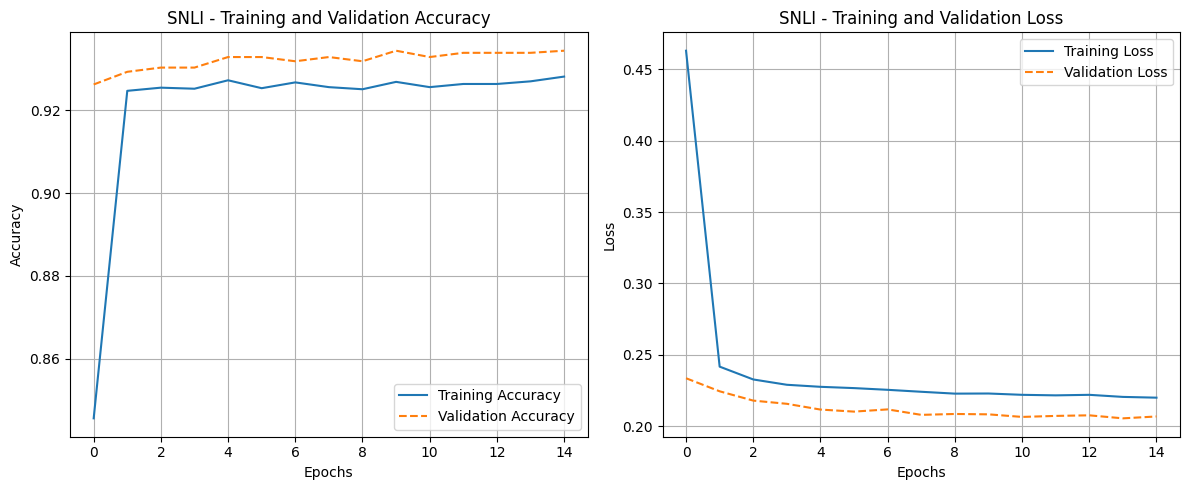

In [74]:
# MNLI Matched
plot_training_history(history_snli, title_prefix="SNLI")

In [75]:
# Call the function for a specific task (example: MNLI matched)
history_mnli_matched, test_loss_mnli_matched, test_accuracy_mnli_matched, trained_model_mnli_matched = train_and_evaluate(
    X_mnli_matched_train, y_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_test, epochs=20, batch_size=32
)

print("Test loss on MNLI-m:", test_loss_mnli_matched)
print("Test accuracy on MNLI-m:", test_accuracy_mnli_matched)

# Now you can use `history` to plot the training and validation loss/accuracy over epochs


Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7605 - loss: 0.6488 - val_accuracy: 0.9114 - val_loss: 0.2634 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9074 - loss: 0.2898 - val_accuracy: 0.9114 - val_loss: 0.2542 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.2646 - val_accuracy: 0.9093 - val_loss: 0.2484 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.2670 - val_accuracy: 0.9103 - val_loss: 0.2436 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2433 - val_accuracy: 0.9114 - val_loss: 0.2419 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9103 - loss: 0.2647 - val_accuracy: 0.9114 - val_loss: 0.2400 - learning_rate: 5.0000e-04
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9077 - los

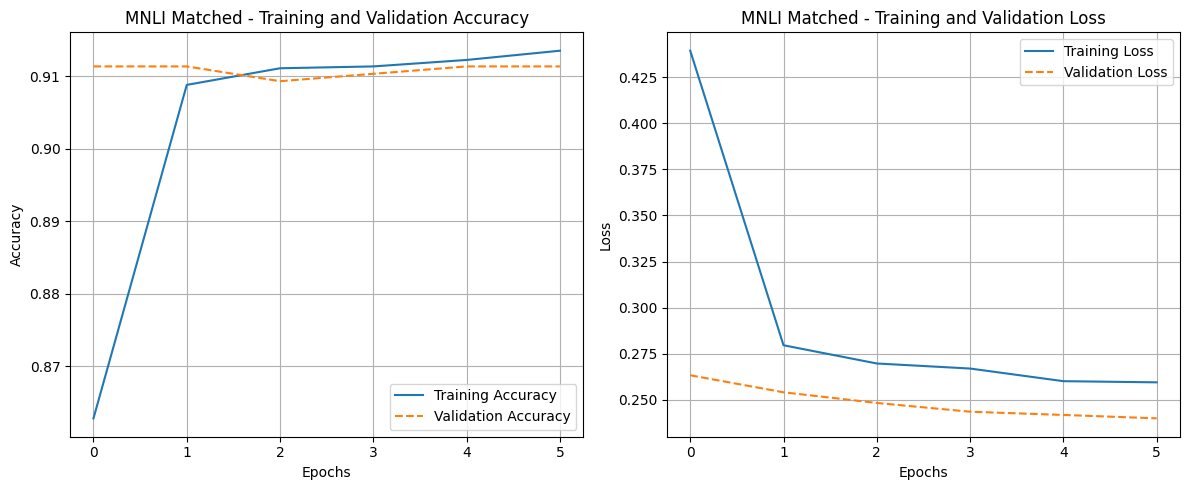

In [76]:
# MNLI Matched
plot_training_history(history_mnli_matched, title_prefix="MNLI Matched")



In [77]:
# Call the function for MNLI mismatched
history_mnli_mismatched, test_loss_mnli_mismatched, test_accuracy_mnli_mismatched, trained_model_mnli_mismatched = train_and_evaluate(
    X_mnli_mismatched_train, y_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_test, epochs=20, batch_size=32
)

print("Test loss on MNLI-mm:", test_loss_mnli_mismatched)
print("Test accuracy on MNLI-mm:", test_accuracy_mnli_mismatched)

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8616 - loss: 0.6150 - val_accuracy: 0.9131 - val_loss: 0.2785 - learning_rate: 5.0000e-04
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9123 - loss: 0.2694 - val_accuracy: 0.9126 - val_loss: 0.2728 - learning_rate: 5.0000e-04
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9116 - loss: 0.2655 - val_accuracy: 0.9110 - val_loss: 0.2688 - learning_rate: 5.0000e-04
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9096 - loss: 0.2681 - val_accuracy: 0.9100 - val_loss: 0.2652 - learning_rate: 5.0000e-04
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.2436 - val_accuracy: 0.9110 - val_loss: 0.2612 - learning_rate: 5.0000e-04
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.2463 - val_accuracy: 0.9085 - val_loss: 0.2610 - learning_rate: 5.0000e-04
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9085 - los

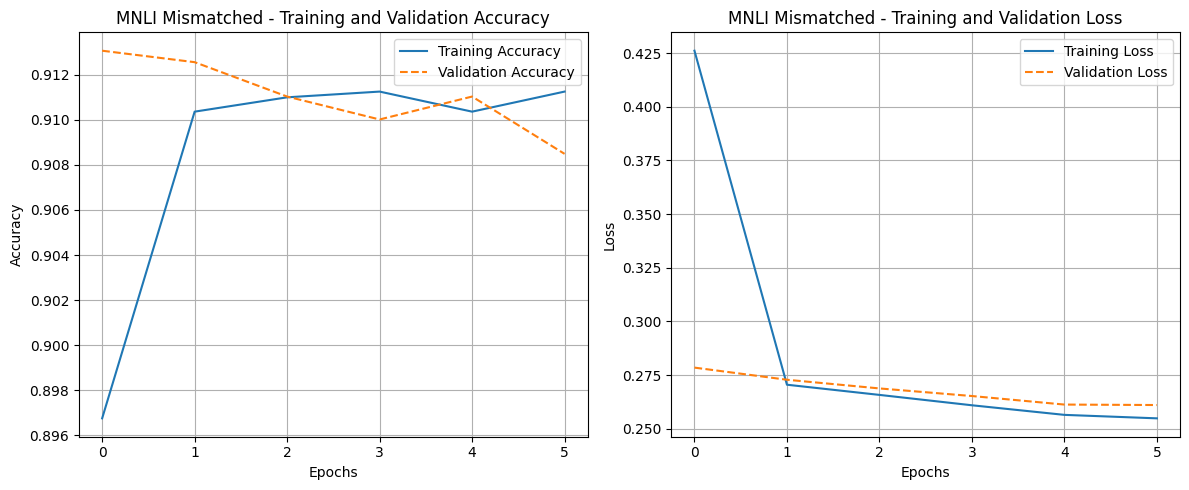

In [78]:
# MNLI Mismatched
plot_training_history(history_mnli_mismatched, title_prefix="MNLI Mismatched")


In [79]:
# Call the function for ANLI round 1
history_anli_r1, test_loss_anli_r1, test_accuracy_anli_r1, trained_model_anli_r1 = train_and_evaluate(
    X_anli_r1_train, y_anli_r1_train, X_anli_r1_test, y_anli_r1_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R1:", test_loss_anli_r1)
print("Test accuracy on ANLI R1:", test_accuracy_anli_r1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4337 - loss: 1.0446 - val_accuracy: 0.6400 - val_loss: 0.9495 - learning_rate: 5.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5865 - loss: 0.9530 - val_accuracy: 0.6200 - val_loss: 0.8940 - learning_rate: 5.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6295 - loss: 0.9092 - val_accuracy: 0.6200 - val_loss: 0.8685 - learning_rate: 5.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5855 - loss: 0.9133 - val_accuracy: 0.6250 - val_loss: 0.8567 - learning_rate: 5.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 0.8878 - val_accuracy: 0.6300 - val_loss: 0.8529 - learning_rate: 5.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6072 - loss: 0.9142 - val_accuracy: 0.6250 - val_loss: 0.8480 - learning_rate: 5.0000e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6388 - loss: 0.9383 
Tes

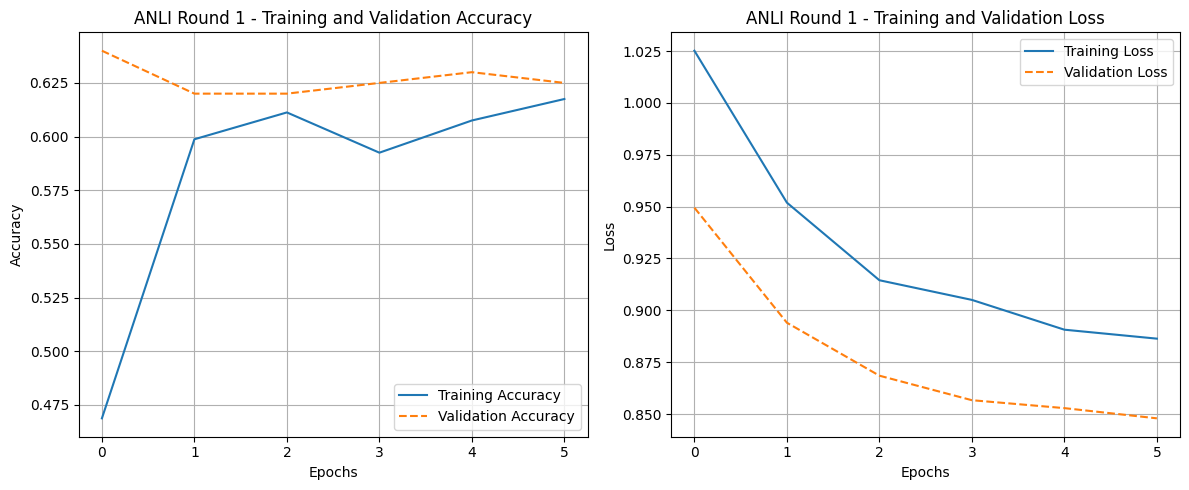

In [80]:
# ANLI Round 1
plot_training_history(history_anli_r1, title_prefix="ANLI Round 1")

In [81]:
# Call the function for ANLI round 2
history_anli_r2, test_loss_anli_r2, test_accuracy_anli_r2, trained_model_anli_r2 = train_and_evaluate(
    X_anli_r2_train, y_anli_r2_train, X_anli_r2_test, y_anli_r2_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R2:", test_loss_anli_r2)
print("Test accuracy on ANLI R2:", test_accuracy_anli_r2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3700 - loss: 1.1005 - val_accuracy: 0.6000 - val_loss: 0.9745 - learning_rate: 5.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5627 - loss: 0.9886 - val_accuracy: 0.6800 - val_loss: 0.9056 - learning_rate: 5.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - loss: 0.9413 - val_accuracy: 0.6800 - val_loss: 0.8730 - learning_rate: 5.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6275 - loss: 0.8919 - val_accuracy: 0.6800 - val_loss: 0.8614 - learning_rate: 5.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6056 - loss: 0.9102 - val_accuracy: 0.6800 - val_loss: 0.8560 - learning_rate: 5.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6119 - loss: 0.8997 - val_accuracy: 0.6900 - val_loss: 0.8508 - learning_rate: 5.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6196 - loss

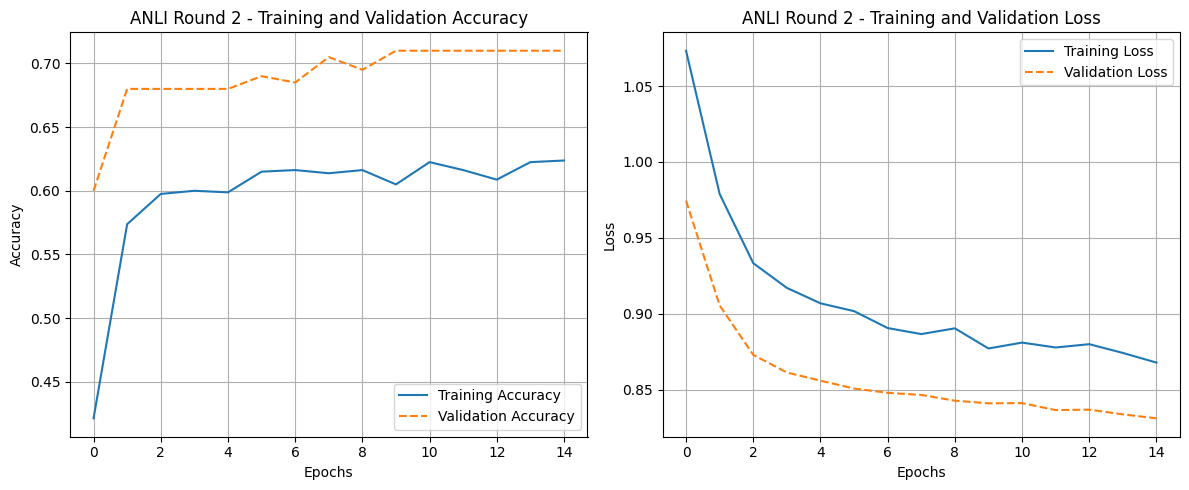

In [82]:
# ANLI Round 2
plot_training_history(history_anli_r2, title_prefix="ANLI Round 2")

In [83]:
# Call the function for ANLI round 3
history_anli_r3, test_loss_anli_r3, test_accuracy_anli_r3, trained_model_anli_r3 = train_and_evaluate(
    X_anli_r3_train, y_anli_r3_train, X_anli_r3_test, y_anli_r3_test, epochs=20, batch_size=32
)

print("Test loss on ANLI R3:", test_loss_anli_r3)
print("Test accuracy on ANLI R3:", test_accuracy_anli_r3)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4418 - loss: 1.0554 - val_accuracy: 0.6750 - val_loss: 0.9286 - learning_rate: 5.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6160 - loss: 0.9428 - val_accuracy: 0.6750 - val_loss: 0.8610 - learning_rate: 5.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.9205 - val_accuracy: 0.6667 - val_loss: 0.8284 - learning_rate: 5.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 0.9033 - val_accuracy: 0.6667 - val_loss: 0.8134 - learning_rate: 5.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.8810 - val_accuracy: 0.6583 - val_loss: 0.8078 - learning_rate: 5.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 0.9060 - val_accuracy: 0.6625 - val_loss: 0.8037 - learning_rate: 5.0000e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - loss: 0.9340 
Tes

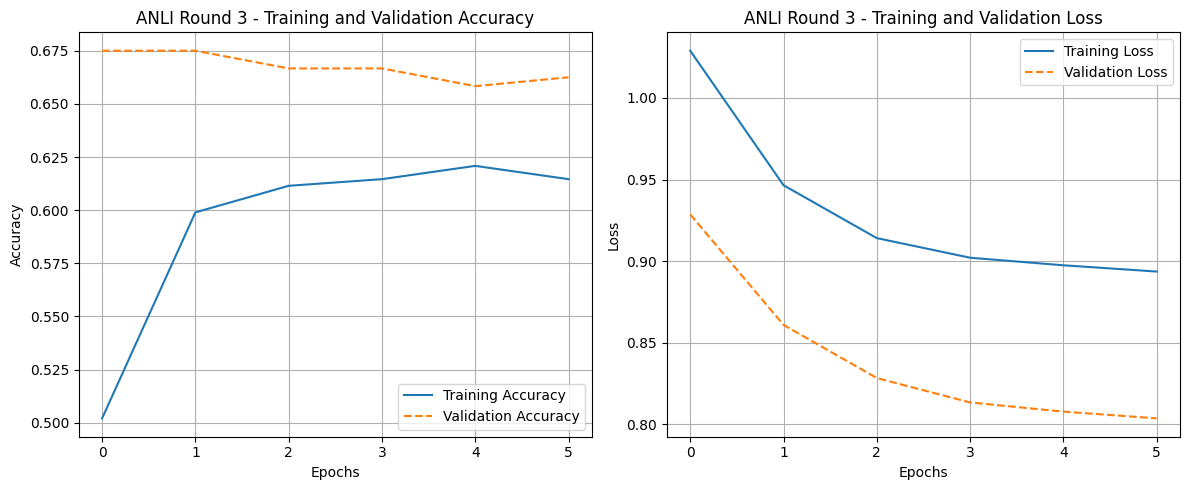

In [84]:
# ANLI Round 3
plot_training_history(history_anli_r3, title_prefix="ANLI Round 3")

In [85]:
# Call the function for ANLI round 3
history_all, test_loss_all, test_accuracy_all, trained_model_all = train_and_evaluate(
    X_all_train, y_all_train, X_all_test, y_all_test, epochs=20, batch_size=32
)

print("Test loss on Combined Tasks:", test_loss_all)
print("Test accuracy on Combined Tasks:", test_accuracy_all)

Epoch 1/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8501 - loss: 0.4910 - val_accuracy: 0.8890 - val_loss: 0.3288 - learning_rate: 5.0000e-04
Epoch 2/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8897 - loss: 0.3253 - val_accuracy: 0.8881 - val_loss: 0.3269 - learning_rate: 5.0000e-04
Epoch 3/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8932 - loss: 0.3151 - val_accuracy: 0.8911 - val_loss: 0.3198 - learning_rate: 5.0000e-04
Epoch 4/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8959 - loss: 0.3062 - val_accuracy: 0.8907 - val_loss: 0.3187 - learning_rate: 5.0000e-04
Epoch 5/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8976 - loss: 0.3005 - val_accuracy: 0.8913 - val_loss: 0.3164 - learning_rate: 5.0000e-04
Epoch 6/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8931 - loss: 0.3142 - val_accuracy: 0.8916 - val_loss: 0.3143 - learning_rate: 5.0000e-04
Epoch 7/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 

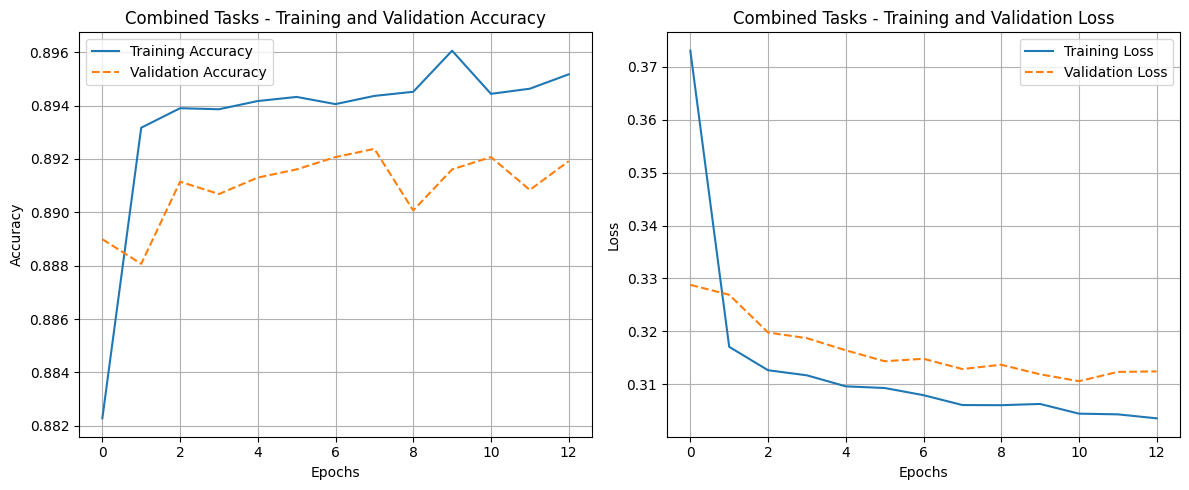

In [86]:
# ANLI Round 3
plot_training_history(history_all, title_prefix="Combined Tasks")